**–õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è. –ú–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏**

# –¢–µ–æ—Ä–∏—è

**–§—É–Ω–∫—Ü–∏—è** –ø–æ—Ç–µ—Ä—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: $L(x) = \frac{1}{m} \sum_{i=1}^{m} ln(1 + exp(-b_i * a_i^Tx)) + \frac{\lambda}{2}||x||_2^2$

**–§—É–Ω–∫—Ü–∏—è** –ø–æ—Ç–µ—Ä—å –≤ –º–∞—Ç—Ä–∏—á–Ω–æ-–≤–µ–∫—Ç–æ—Ä–Ω–æ–º –≤–∏–¥–µ: $L(x) = \frac{1}{m} ln\left(1 + \exp(-B \cdot (A^T x))\right) + \frac{\lambda}{2} ||x||_2^2 $

--------------
–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –ø—Ä–∞–≤–∏–ª–∞–º–∏ –º–∞—Ç—Ä–∏—á–Ω-–≤–µ–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è:

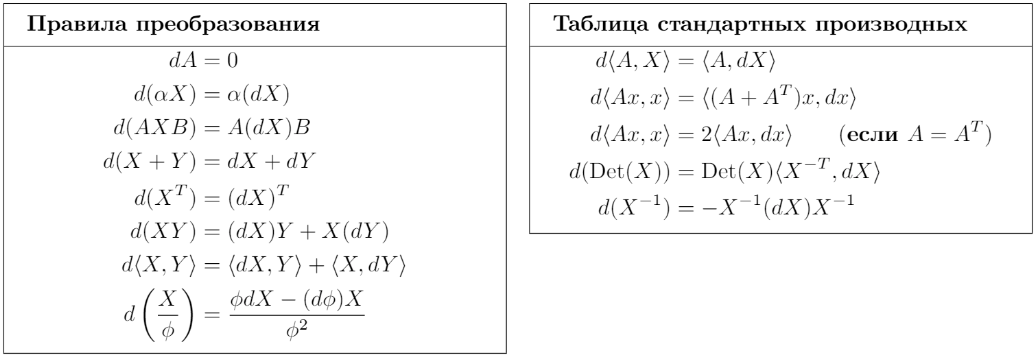

$\nabla{f(X)} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ... , \frac{\partial f}{\partial x_n})$, –≥–¥–µ $X=(x_1, ... , x_n)$

--------------
**–ì—Ä–∞–¥–∏–µ–Ω—Ç** –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å: $\nabla L(x) = \frac{1}{m} \sum_{i=1}^{m} \sigma(-b_i * a_i^Tx) * (-b_i * a_i^Tx) + \lambda x, \text{  –≥–¥–µ  } \sigma(z) = \frac{1}{1 + exp(-z)}$

**–ì—Ä–∞–¥–∏–µ–Ω—Ç** –≤ –º–∞—Ç—Ä–∏—á–Ω–æ-–≤–µ–∫—Ç–æ—Ä–Ω–æ–º –≤–∏–¥–µ: $\nabla L(x) = \frac{1}{m} A^T \left(\sigma(-B \cdot (A^T x)) \circ (-B)\right) + \lambda x$

--------------

**–ì–µ—Å—Å–∏–∞–Ω** –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å: $\nabla^2 L(x) = \frac{1}{m} A^T*D(x)*A + \lambda I, \text{  –≥–¥–µ  } D(x) = diag[\sigma(b_i * a_i^Tx)*(1-\sigma(b_i * a_i^Tx))]$

# –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã

In [1]:
import pandas as pd
import numpy as np
import scipy
import time
from scipy.special import expit
import scipy.sparse
import matplotlib.pyplot as plt
from plot_trajectory_2d import plot_trajectory, plot_levels
from oracles import create_log_reg_oracle, QuadraticOracle
from optimization import gradient_descent, newton

import warnings
warnings.filterwarnings("ignore")

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 1

–í –¥–∞–Ω–Ω–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –∏—Å—Å–ª–µ–¥—É–µ–º —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –Ω–∞ –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏
$$f(x) = \frac{1}{2}<Ax, x> - <b, x>$$

In [138]:
def experiment1(A1, b1, A2, b2, A3, b3, x0, max_iter, line_search_options):

    # –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ—Ä–∞–∫—É–ª–æ–≤
    oracle1 = QuadraticOracle(A1, b1)
    oracle2 = QuadraticOracle(A2, b2)
    oracle3 = QuadraticOracle(A3, b3)

    # –∑–∞–ø–∏—Å–∞—å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ [x]
    history1 = gradient_descent(oracle=oracle1, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]
    history2 = gradient_descent(oracle=oracle2, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]
    history3 = gradient_descent(oracle=oracle3, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    plt.sca(axs[0])
    plot_levels(oracle1.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle1, history1['x'], label="Function 1")
    axs[0].set_title("Function 1")

    plt.sca(axs[1])
    plot_levels(oracle2.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle2, history2['x'], label="Function 2")
    axs[1].set_title("Function 2")

    plt.sca(axs[2])
    plot_levels(oracle3.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle3, history3['x'], label="Function 3")
    axs[2].set_title("Function 3")

    plt.tight_layout()
    plt.show()

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª–µ–¥—É—é—â–∏–µ 3 —Ñ—É–Ω–∫—Ü–∏–∏:

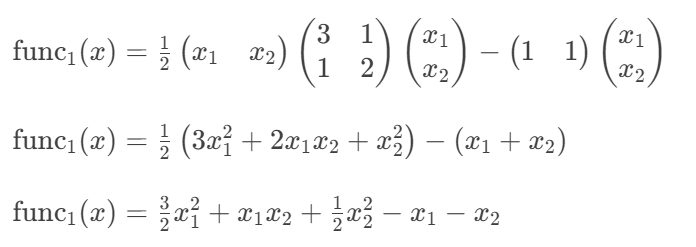

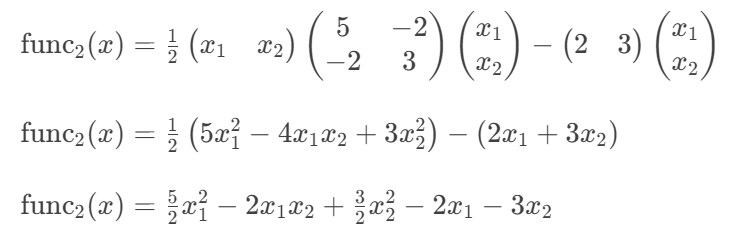

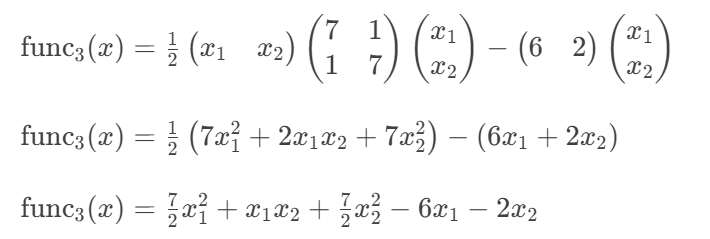

In [142]:
A1 = np.array([[3, 1], [1, 2]])
b1 = np.array([1, 1])

A2 = np.array([[5, -2], [-2, 3]])
b2 = np.array([2, 3])

A3 = np.array([[7, 1], [1, 7]])
b3 = np.array([6, 2])

### –ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è

–î–ª—è –ø–µ—Ä–≤–æ–≥–æ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –≤–æ–∑—å–º–µ–º –Ω–∞—á–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞–ª–µ–∫–æ –æ—Ç –∏—Å–∫–æ–º–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ –Ω–∞ –∫–∞–∂–¥–æ–π –∏–∑ —Ç—Ä–µ—Ö —Ñ—É–Ω–∫—Ü–∏–π - —Ç–æ—á–∫—É (5, 5):

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


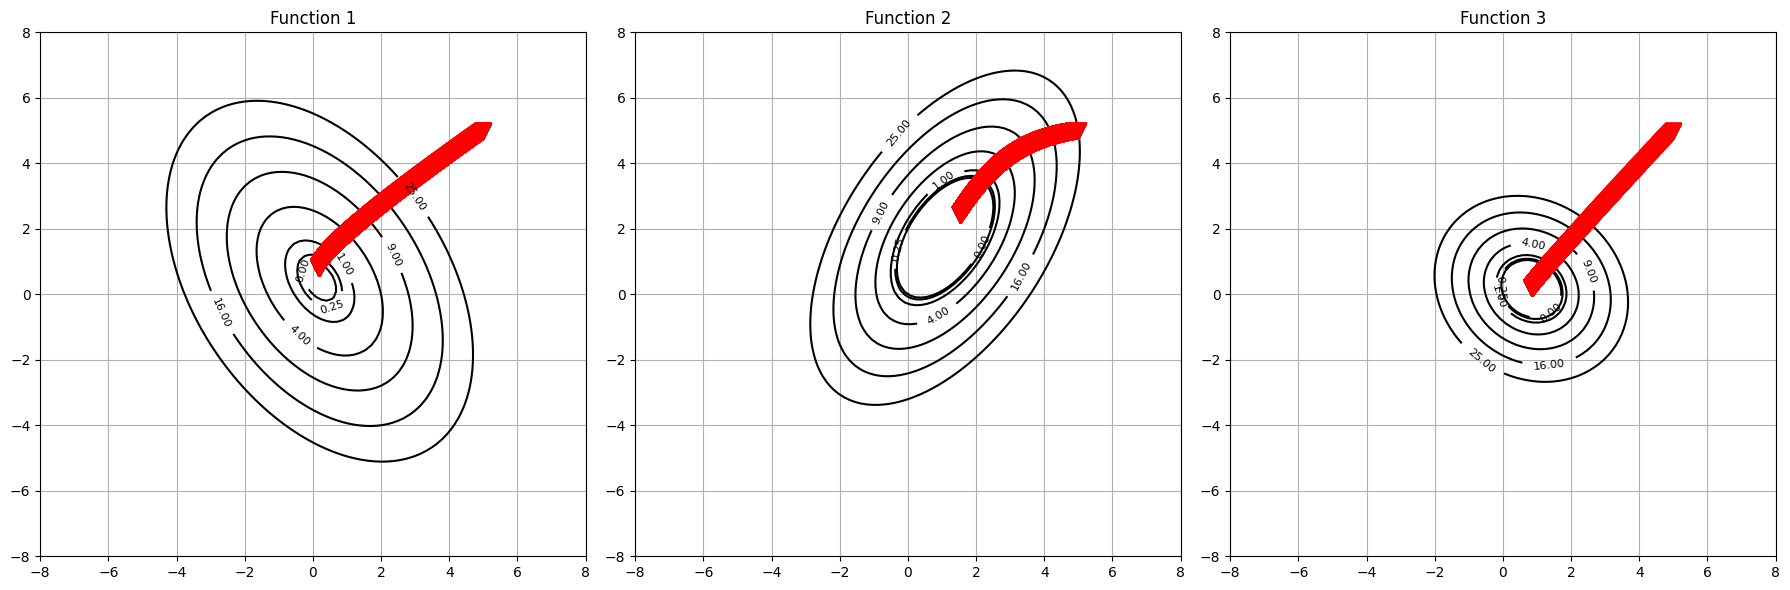

CPU times: total: 609 ms
Wall time: 1.23 s


In [140]:
%%time

x0 = np.array([5, 5])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Constant', 'c': 1e-4})

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º —Ö0, –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–µ –∫ —ç–∫—Å—Ç—Ä–µ–º—É–º—É:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


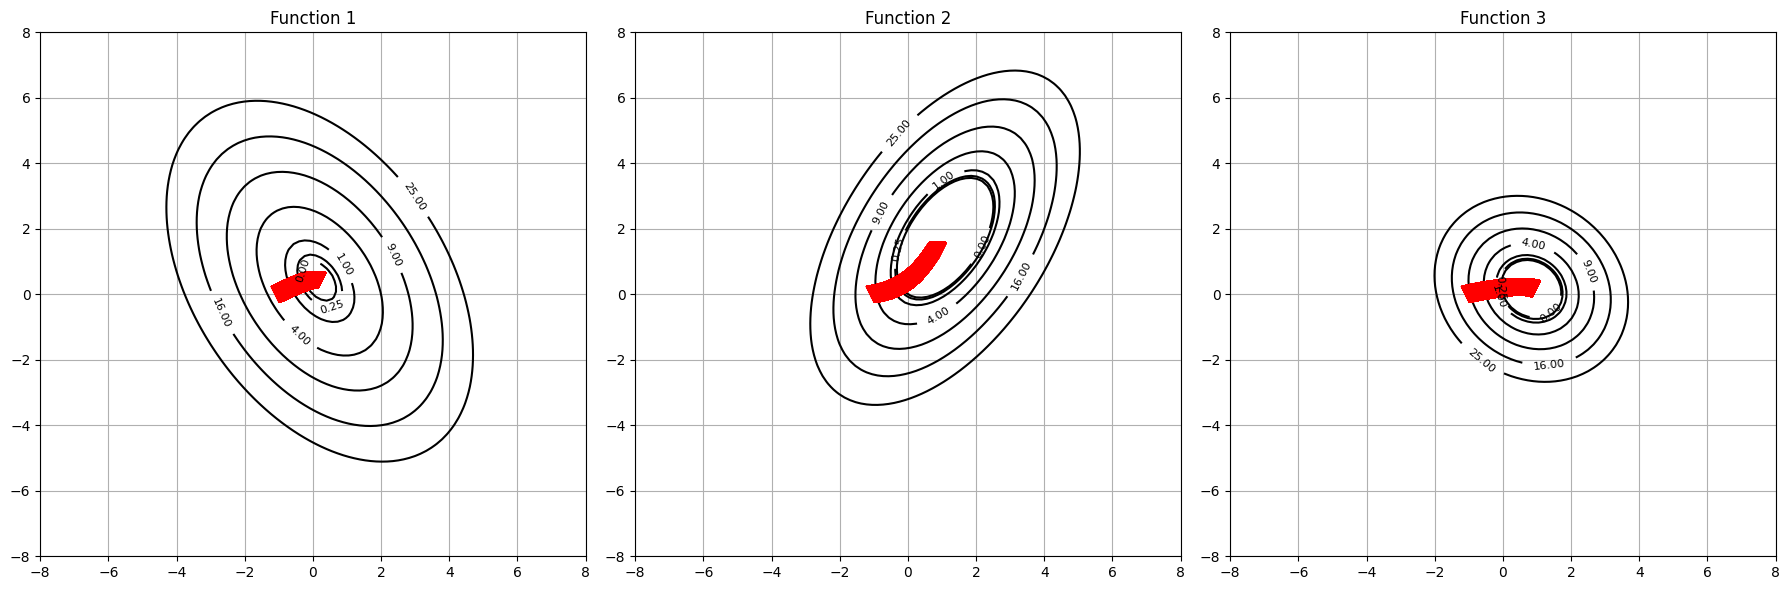

CPU times: total: 844 ms
Wall time: 1.14 s


In [143]:
%%time

x0 = np.array([-1, 0])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Constant', 'c': 1e-4})

### –ê—Ä–º–∏—Ö–æ

–ü–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–µ–π —Å–Ω–∞—á–∞–ª–∞ –≤–æ–∑—å–º–µ–º –Ω–∞—á–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞–ª–µ–∫–æ –æ—Ç –∏—Å–∫–æ–º–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ –Ω–∞ –∫–∞–∂–¥–æ–π –∏–∑ —Ç—Ä–µ—Ö —Ñ—É–Ω–∫—Ü–∏–π:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


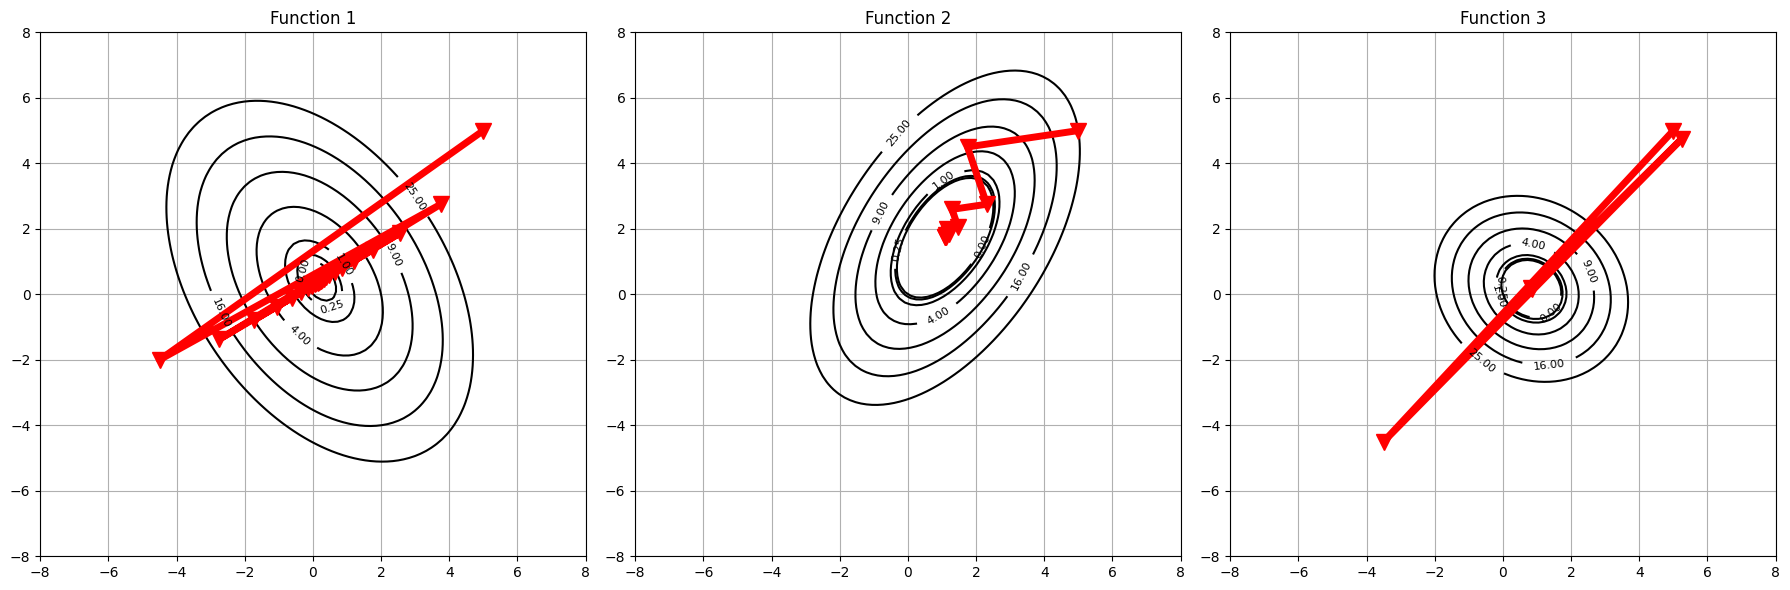

CPU times: total: 547 ms
Wall time: 1.3 s


In [145]:
%%time

x0 = np.array([5, 5])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1})

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º —Ö0, –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–µ –∫ —ç–∫—Å—Ç—Ä–µ–º—É–º—É:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


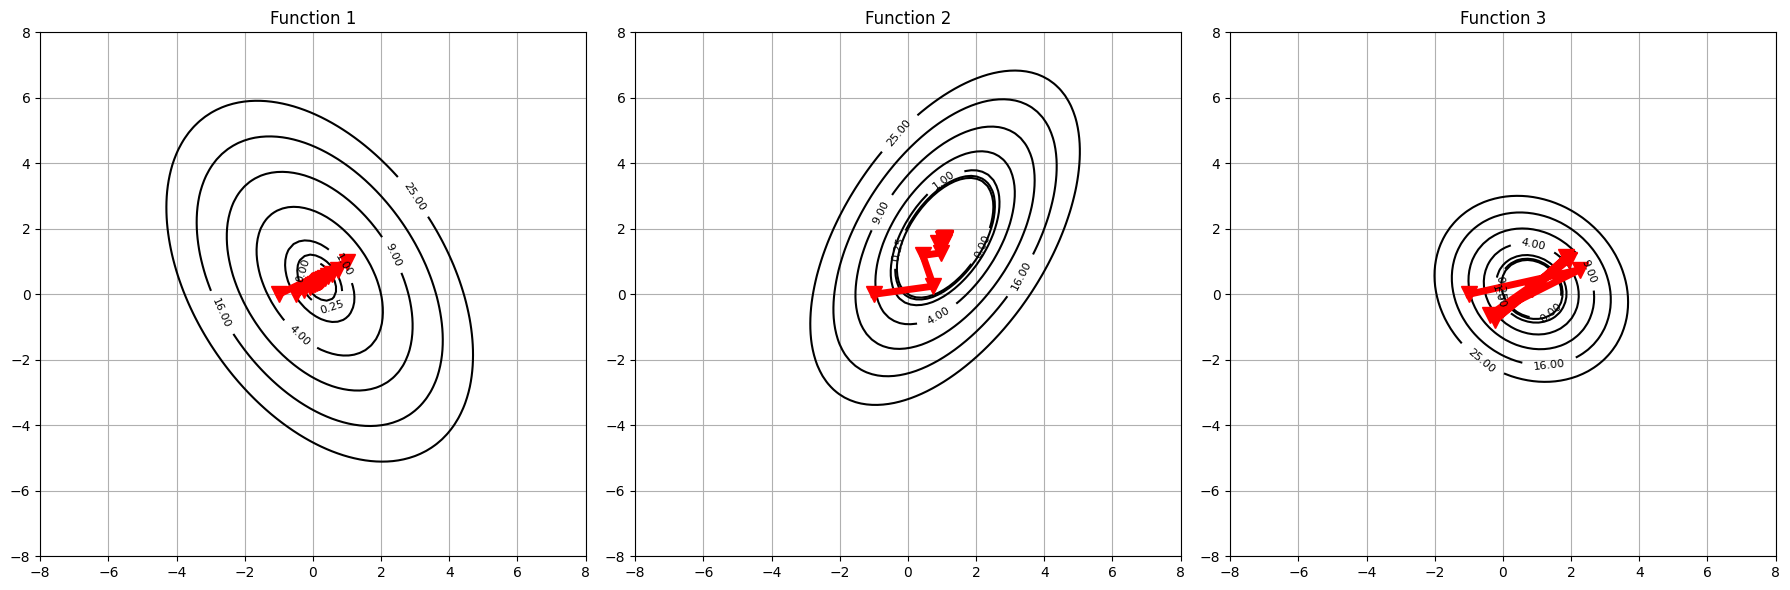

CPU times: total: 562 ms
Wall time: 1.08 s


In [146]:
%%time

x0 = np.array([-1, 0])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1})

### –í—É–ª—å—Ñ

–í–æ–∑—å–º–µ–º –Ω–∞—á–∞–ª—å–Ω—É—é —Ç–æ—á–∫—É, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞–ª–µ–∫–æ –æ—Ç –∏—Å–∫–æ–º–æ–≥–æ –º–∏–Ω–∏–º—É–º–∞ –Ω–∞ –∫–∞–∂–¥–æ–π –∏–∑ —Ç—Ä–µ—Ö —Ñ—É–Ω–∫—Ü–∏–π:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


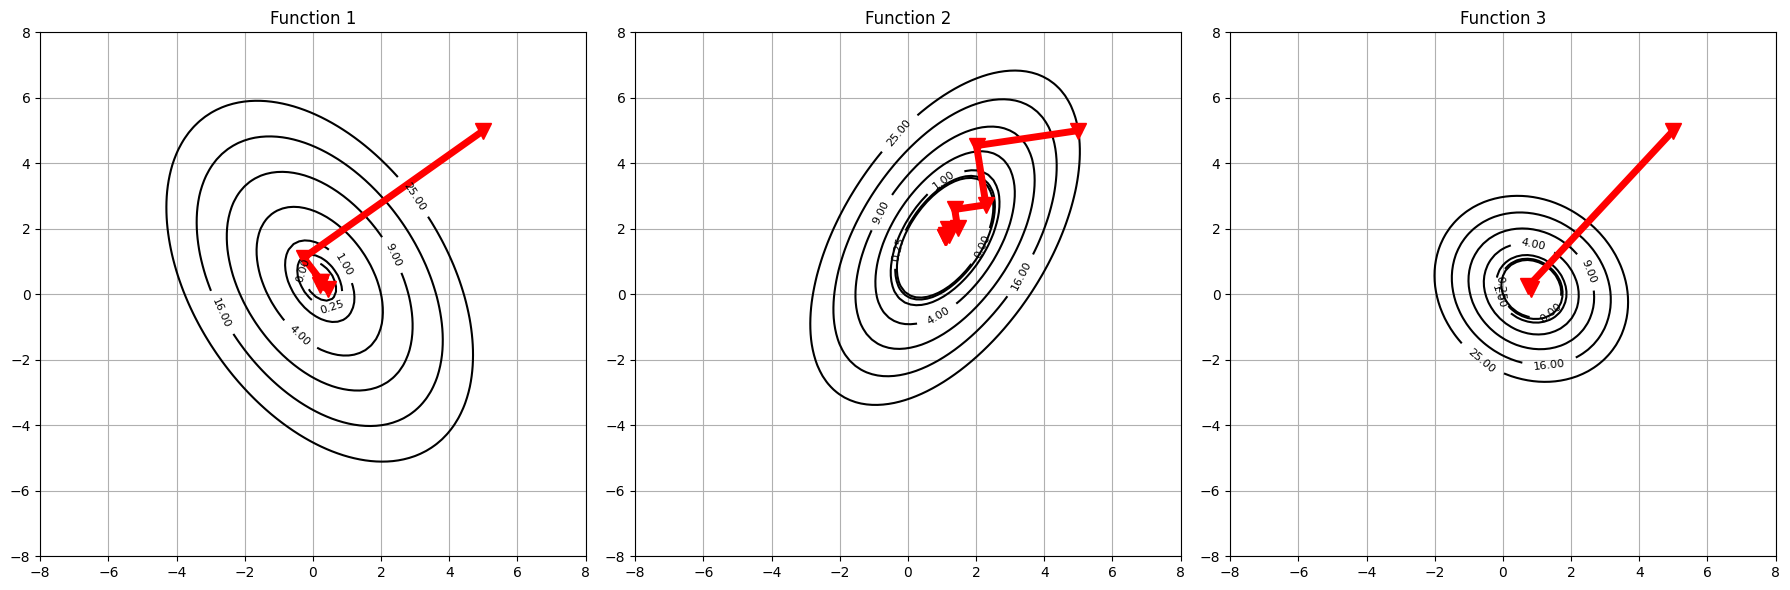

CPU times: total: 906 ms
Wall time: 2.01 s


In [147]:
%%time

x0 = np.array([5, 5])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Wolfe', 'c1': 1e-4, 'c2':0.9, 'alpha_0':1.0})

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º —Ö0, –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–µ –∫ —ç–∫—Å—Ç—Ä–µ–º—É–º—É:

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏


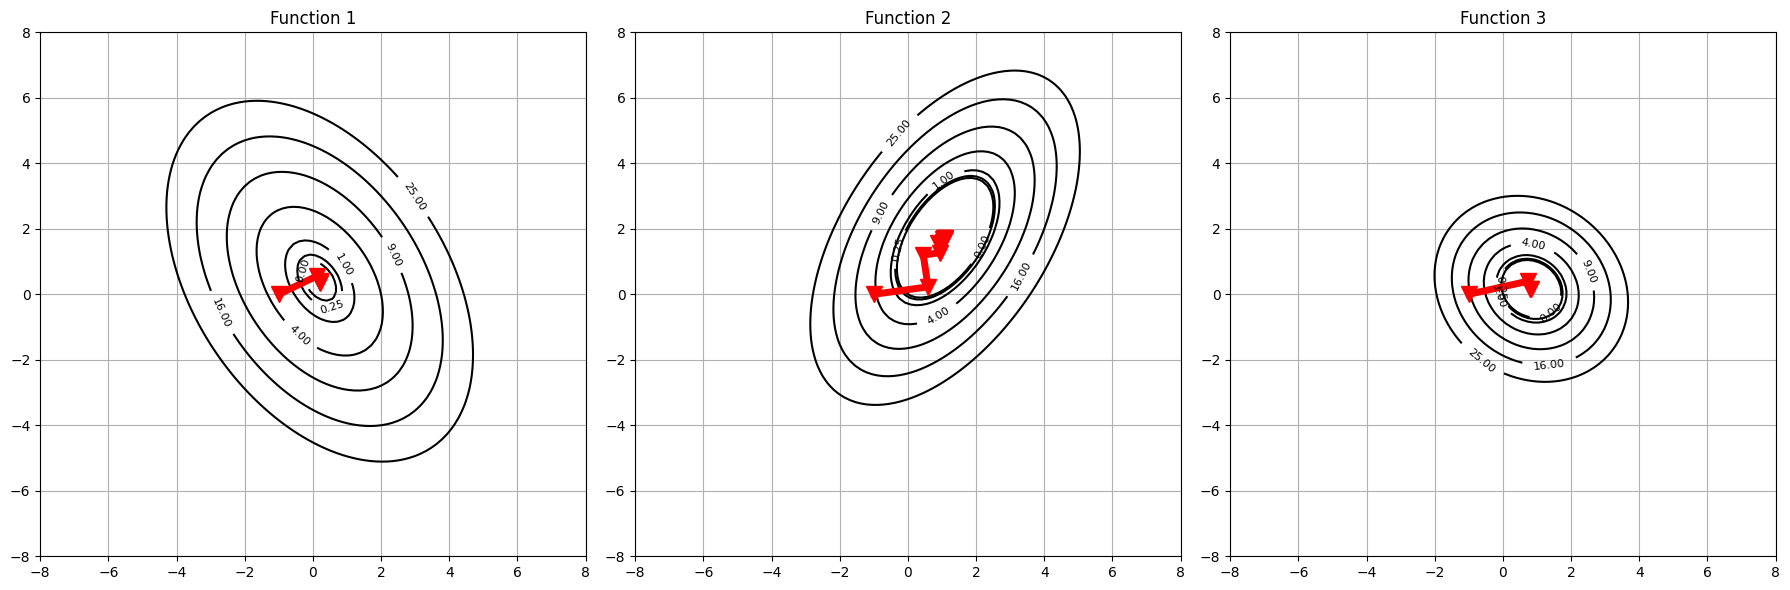

CPU times: total: 578 ms
Wall time: 1.01 s


In [148]:
%%time

x0 = np.array([-1, 0])
print('–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –∏—Ö —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —Å–ª—É—á–∞–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Wolfe', 'c1': 1e-4, 'c2':0.9, 'alpha_0':1.0})

### –í—ã–≤–æ–¥—ã

–ó–Ω–∞–µ–º –ø—Ä–æ —á–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏:
–î–ª—è —Å–∏—Å—Ç–µ–º—ã –ª–∏–Ω–µ–π–Ω—ã—Ö —É—Ä–∞–≤–Ω–µ–Ω–∏–π –≤–∏–¥–∞ Ax=b, —á–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ A –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç—Å—è –∫–∞–∫ $\kappa(A)$ –∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –Ω–æ—Ä–º—ã –∫ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –Ω–æ—Ä–º–µ: $\kappa(A) = ||A|| * ||A^{-1}||$

–î–ª—è –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã A —á–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–∂–Ω–æ –≤—ã—á–∏—Å–ª–∏—Ç—å —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ï—Å–ª–∏ $\lambda 1, \lambda 2, ... , \lambda n$ ‚Äî —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã, —Ç–æ —á–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ –º–æ–¥—É–ª—é —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–º—É –ø–æ –º–æ–¥—É–ª—é —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é: $\kappa (A) = \frac{\max | \lambda_i |}{\min | \lambda_i |}$


–ß–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –Ω–∞—à–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤:

1) $\kappa(A_1) = \frac{max(4, 1)}{min(4, 1)} = 4$

1) $\kappa(A_2) = \frac{max(7, 1)}{min(7, 1)} = 7$

1) $\kappa(A_3) = \frac{max(7, 7)}{min(7, 7)} = 1$

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤—ã—à–µ –ø–æ–Ω–∏–º–∞–µ–º, —á—Ç–æ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–ª–µ–¥—É—é—â–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:

1) **–ß–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏**

–ú–æ–¥–µ–º –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —á–µ–º –≤—ã—à–µ —á–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –º–∞—Ç—Ä–∏—Ü—ã A –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏, —Ç–µ–º —Å–ª–æ–∂–Ω–µ–µ –∑–∞–¥–∞—á–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –∏ —Ç–µ–º –º–µ–¥–ª–µ–Ω–Ω–µ–µ —Å—Ö–æ–¥–∏—Ç—Å—è –º–µ—Ç–æ–¥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ (—Ç—Ä–µ–±—É–µ—Ç—Å—è –±–æ–ª—å—à–µ —à–∞–≥–æ–≤)

2) **–ù–∞—á–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞**

–í—ã–±–æ—Ä –Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–æ—á–∫–∏ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é –º–µ—Ç–æ–¥–∞. –ù–∞—á–∞–ª–æ –≤ —Ç–æ—á–∫–µ, –±–ª–∏–∑–∫–æ–π –∫ –æ–ø—Ç–∏–º—É–º—É, —É—Å–∫–æ—Ä—è–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å.

3) **–°—Ç—Ä–∞—Ç–µ–≥–∏—è –≤—ã–±–æ—Ä–∞ —à–∞–≥–∞ (–∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–∞—è, –ê—Ä–º–∏—Ö–æ, –í—É–ª—å—Ñ–∞)**

–ö–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—É—é —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –ª—É—á—à–µ –ø—Ä–∏–º–µ–Ω—è—Ç—å –¥–ª—è –ø—Ä–æ—Å—Ç—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π (–¥–ª—è —Ö–æ—Ä–æ—à–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω—ã—Ö –∑–∞–¥–∞—á), –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ –∞–ª–≥–æ—Ä–∏—Ç–º—É —Ç—Ä–µ–±—É–µ—Ç—Å—è –º–Ω–æ–≥–æ —à–∞–≥–æ–≤ –¥–ª—è –ø–æ–ø–∞–¥–∞–Ω–∏—è –≤ —ç–∫—Å—Ç—Ä–µ–º—É–º (–≤–∏–¥–∏–º —ç—Ç–æ –Ω–∞ 1–æ–º –∏ 2–æ–º –≥—Ä–∞—Ñ–∏–∫–∞—Ö).
–°—Ç—Ä–∞—Ç–µ–≥–∏—è –ê—Ä–º–∏—Ö–æ (–∞–¥–∞–ø—Ç–∏–≤–Ω—ã–π —à–∞–≥) —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –¥–ª—è —Å–ª—É—á–∞–µ–≤, –∫–æ–≥–¥–∞ –Ω–∞—á–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞ –Ω–µ —Ç–∞–∫ –¥–∞–ª–µ–∫–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –æ—Ç —ç–∫—Å—Ç—Ä–µ–º—É–º–∞. 
–°—Ç—Ä–∞—Ç–µ–≥–∏—è –í—É–ª—å—Ñ–∞ —Å—Ç—Ä–µ–º–∏—Ç—Å—è –Ω–∞–π—Ç–∏ —à–∞–≥, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏–π —É—Å–ª–æ–≤–∏—è–º –í—É–ª—å—Ñ–∞, –ø–æ–ª–µ–∑–Ω–∞ –¥–ª—è –∑–∞–¥–∞—á —Å –≤—ã—Å–æ–∫–∏–º —á–∏—Å–ª–æ–º –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏. –ò–∑ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤–∏–¥–∏–º, —á—Ç–æ —É –¥–∞–Ω–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —à–∞–≥–∏ –±–æ–ª–µ–µ —à—É–º–Ω—ã–µ, –Ω–æ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–æ–∂–µ—Ç –¥–æ—Å—Ç–∏–≥–∞—Ç—å—Å—è –±—ã—Å—Ç—Ä–µ–µ.

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 2

–í –¥–∞–Ω–Ω–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –∏—Å—Å–ª–µ–¥—É–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —á–∏—Å–ª–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –æ—Ç 

1) —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏
2) —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞

In [11]:
def generate_diagonal_matrix(n, kappa):
    """
    –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —Ä–∞–∑–º–µ—Ä–∞ n —Å —á–∏—Å–ª–æ–º –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ kappa.
    –î–∏–∞–≥. —ç–ª-—Ç—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö [1, k]; min(a) = 1, max(a) = k
    """
    eigenvalues = np.linspace(1, kappa, n)
    A = np.diag(eigenvalues)
    return A


def run_experiment(n_values, kappa_values, tolerance=1e-5, max_iter=1000):
    """
    n_values: —Å–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π
    kappa_values: —Å–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π —á–∏—Å–µ–ª –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏
    """
    results = {}
    
    for n in n_values:
        results[n] = []
        for kappa in kappa_values:
            # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã A –∏ –≤–µ–∫—Ç–æ—Ä–∞ b
            A = generate_diagonal_matrix(n, kappa)
            b = np.random.randn(n)
            
            # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ä–∞–∫—É–ª–∞ –¥–ª—è –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏
            oracle = QuadraticOracle(A, b)
            
            # –ó–∞–ø—É—Å–∫ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
            x0 = np.random.randn(n)
            history = gradient_descent(oracle, x0, tolerance=tolerance, max_iter=max_iter, trace=True)[2]
            
            # –ó–∞–ø–∏—Å—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç - —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π
            num_iterations = len(history['func'])
            results[n].append((kappa, num_iterations))
    
    return results

In [12]:
def plot_results(results, n_values, kappa_values):
    plt.figure(figsize=(10, 6))
    for n in n_values:
        iterations = [item[1] for item in results[n]]
        plt.plot(kappa_values, iterations, label=f'n={n}', marker='o')
    
    plt.xscale('log') # log-—à–∫–∞–ª–∞ –æ—Å–∏ –∞–±—Å—Ü–∏—Å—Å
    plt.xlabel('–ß–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ (Œ∫)')
    plt.ylabel('–ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π')
    plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —á–∏—Å–ª–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π –æ—Ç —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –∏ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

In [25]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
n_values = [10, 50, 100, 1000, 5000, 10000]  # –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
kappa_values = [1, 10, 100, 1000, 10000]  # –ß–∏—Å–ª–æ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏

# –ó–∞–ø—É—Å–∫ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
results = run_experiment(n_values, kappa_values)

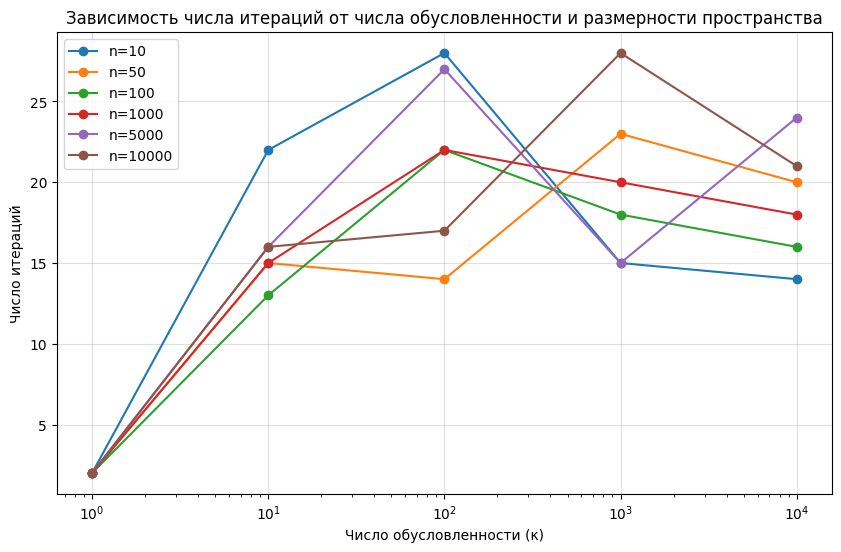

In [26]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plot_results(results, n_values, kappa_values)

**–í—ã–≤–æ–¥—ã**

1) –ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏:
    –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –≤—Å–µ—Ö –∏–∑–º–µ—Ä–µ–Ω–∏–π –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ–µ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏. –ü–æ –º–µ—Ä–µ —É–≤–µ–ª–∏—á–µ–Ω–∏—è —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ Œ∫, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –≤—Å–µ—Ö n —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è, –¥–æ—Å—Ç–∏–≥–∞—è –º–∞–∫—Å–∏–º—É–º–∞ –≤ —Ç–æ—á–∫–µ ~ Œ∫ ‚âà 100. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ Œ∫ —Å–Ω–∞—á–∞–ª–∞ –∑–∞—Ç—Ä—É–¥–Ω—è–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–∞, —Ç—Ä–µ–±—É—è –±–æ–ª—å—à–µ–≥–æ —á–∏—Å–ª–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π. –û–¥–Ω–∞–∫–æ –ø–æ—Å–ª–µ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —á–∏—Å–ª–∞ –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ (~100), –≥—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–Ω–∏–∂–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è –≤—Å–µ—Ö –∑–Ω–∞—á–µ–Ω–∏–π n, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –ø—Ä–∏ –æ—á–µ–Ω—å –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö Œ∫.

2) –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞
    –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –ø—Ä–∏ –º–µ–Ω—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö n (–Ω–∞–ø—Ä–∏–º–µ—Ä, n=10) —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –±—ã—Å—Ç—Ä–æ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Å —Ä–æ—Å—Ç–æ–º Œ∫, —Ç–æ–≥–¥–∞ –∫–∞–∫ –¥–ª—è –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏—Ö n (–Ω–∞–ø—Ä–∏–º–µ—Ä, n=5000, n=10000) –≥—Ä–∞—Ñ–∏–∫ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Ç–∞–∫–∂–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π, –Ω–æ —ç—Ç–æ—Ç —ç—Ñ—Ñ–µ–∫—Ç –±–æ–ª–µ–µ –≤—ã—Ä–∞–∂–µ–Ω –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö n. –ü—Ä–∏ –±–æ–ª—å—à–∏—Ö n —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–Ω–µ–µ –∑–∞–≤–∏—Å–∏–º—ã–º –æ—Ç Œ∫.

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç 3

–í –¥–∞–Ω–Ω–æ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ –ø—Ä–æ–≤–µ–¥–µ–º —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –∏ –ù—å—é—Ç–æ–Ω–∞ –Ω–∞ —Ä–µ–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [24]:
from sklearn.datasets import load_svmlight_file
from datetime import datetime


# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø—É—Å–∫–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
def run_experiment(data, method, regcoef, max_iter=100, tolerance=1e-5):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø—É—Å–∫–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –Ω–∞ –æ–¥–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö —Å –æ–¥–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.
    dataset_path: –ø—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º
    method: –º–µ—Ç–æ–¥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ (gradient_descent –∏–ª–∏ newton)
    regcoef: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    max_iter: –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π
    tolerance: –ø–æ—Ä–æ–≥ —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏—Å—Ç–æ—Ä–∏—é –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏, –Ω–æ—Ä–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –∏ –≤—Ä–µ–º–µ–Ω–∏.
    """
    # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    X, y = data
    X = X.toarray()
    y = 2 * y - 1  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –º–µ—Ç–∫–∏ {0, 1} –≤ {-1, 1}
    
    # –°–æ–∑–¥–∞–µ–º –æ—Ä–∞–∫—É–ª –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    oracle = create_log_reg_oracle(X, y, regcoef)
    
    # –ù–∞—á–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞
    x0 = np.zeros(X.shape[1])
    
    # –ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–∞
    start_time = datetime.now()
    x_star, msg, history = method(oracle, x0, max_iter=max_iter, tolerance=tolerance, trace=True)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∫ –∏—Å—Ç–æ—Ä–∏–∏
    history['time'] = [t  for t in history['time']] 
    return history

In [25]:
def plot_experiment(histories, labels, title):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –Ω–æ—Ä–º—ã –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏.
    histories: —Å–ø–∏—Å–æ–∫ –∏—Å—Ç–æ—Ä–∏–π, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º—ã—Ö –º–µ—Ç–æ–¥–∞–º–∏
    labels: —Å–ø–∏—Å–æ–∫ –º–µ—Ç–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –º–µ—Ç–æ–¥–∞
    title: –∑–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
    """
    plt.figure(figsize=(14, 6))

    # –ì—Ä–∞—Ñ–∏–∫ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history['time'], history['func'], label=label)

    plt.xlabel('–í—Ä–µ–º—è (—Å)')
    plt.ylabel('–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å')
    plt.title(f'–ó–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞ {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    # –ì—Ä–∞—Ñ–∏–∫ –Ω–æ—Ä–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        grad_norm_ratio = np.array(history['grad_norm']) / history['grad_norm'][0]
        plt.plot(history['time'], grad_norm_ratio, label=label)
    plt.xlabel('–í—Ä–µ–º—è (—Å)')
    plt.ylabel('–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –Ω–æ—Ä–º–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞')
    plt.title(f'–ù–æ—Ä–º–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞ {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [26]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞
dataset_paths = [r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\w8a.txt", 
                 r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\gisette_scale\gisette_scale", 
                 r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\real-sim\real-sim"]  # –ü—É—Ç—å –∫ –¥–∞–Ω–Ω—ã–º 

regcoef = lambda m: 1 / m  # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

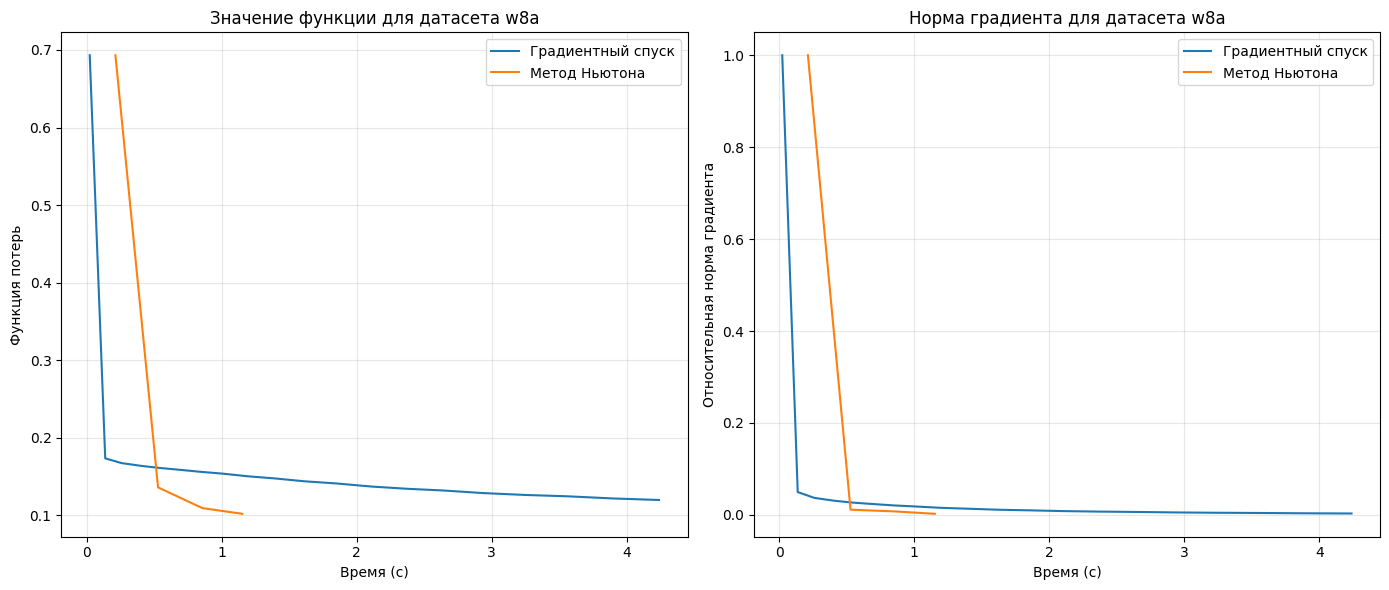

In [27]:
X_, y_ = load_svmlight_file(dataset_paths[0])
regcoef_value = regcoef(X_.shape[0])

# –ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plot_experiment([history_gd, history_newton], ['–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫', '–ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞'], 'w8a')

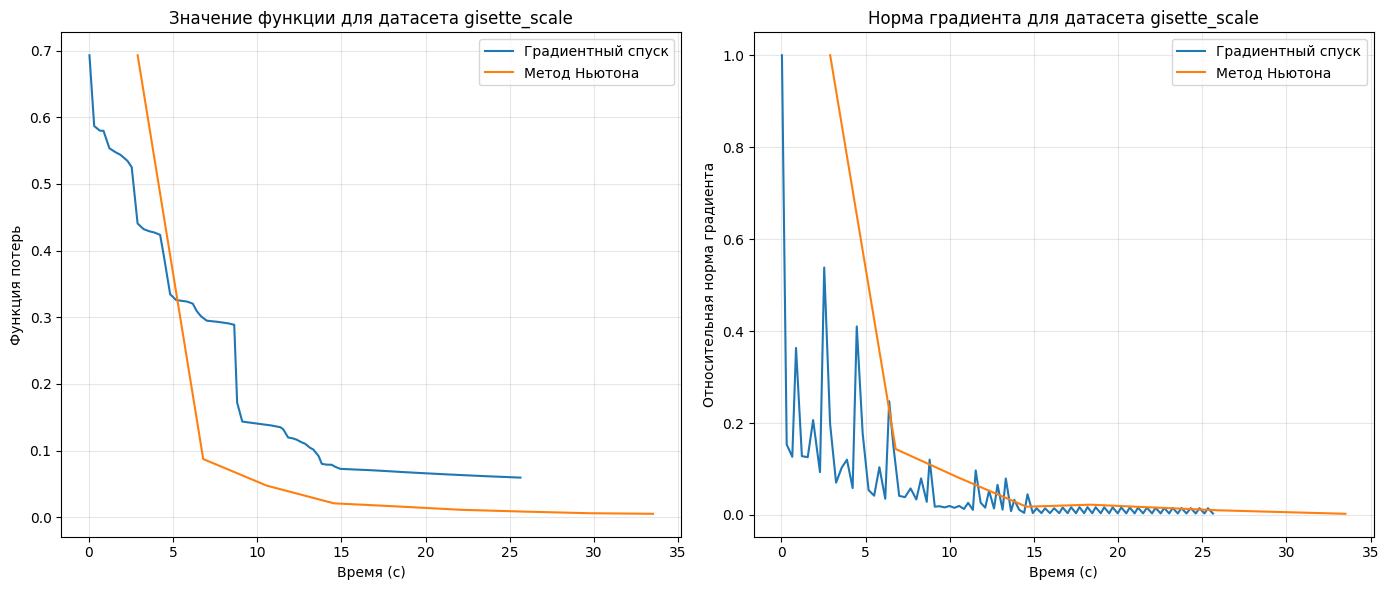

In [28]:
X_, y_ = load_svmlight_file(dataset_paths[1])
regcoef_value = regcoef(X_.shape[0])

# –ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plot_experiment([history_gd, history_newton], ['–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫', '–ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞'], 'gisette_scale')

–î–ª—è —Å–ª–µ–¥—É—é—â–µ–π —á–∞—Å—Ç–∏ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –≤–∑—è—Ç—å –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–∞—Ç–∞—Å–µ—Ç–∞ 'real-sim' –¥–ª—è —Å–Ω–∏–∂–µ–Ω–∏—è –Ω–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–∞–º—è—Ç—å:

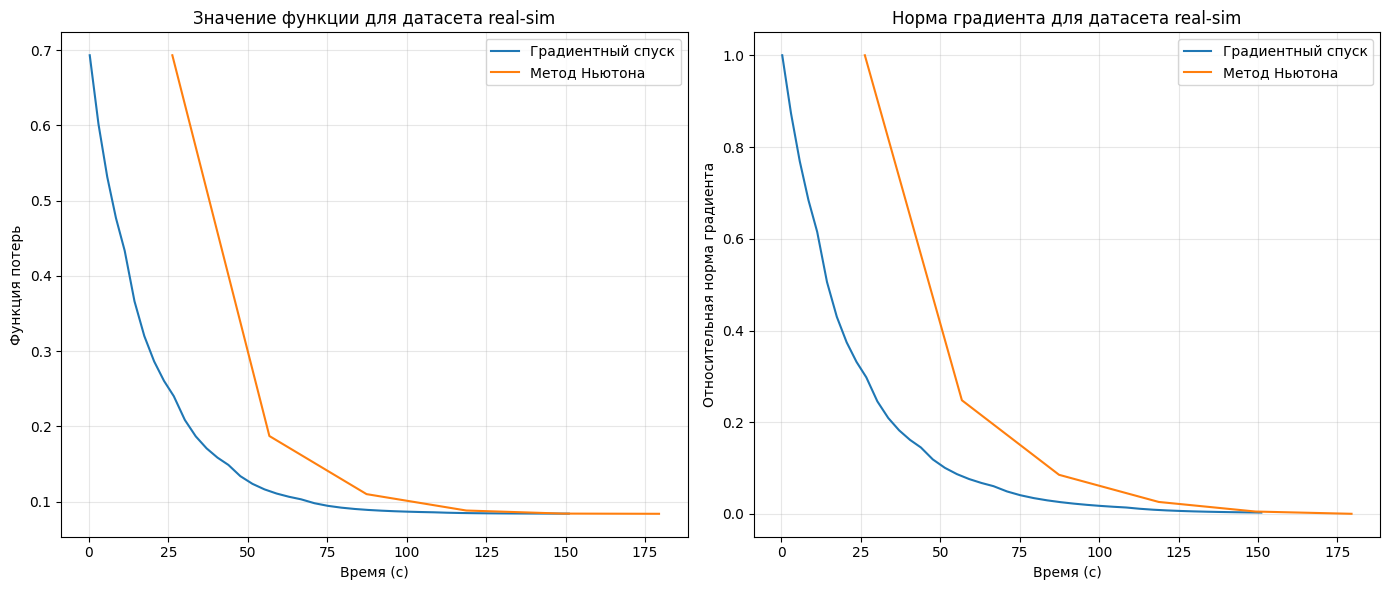

In [37]:
X_, y_ = load_svmlight_file(dataset_paths[2])
X_cut, y_cut = X_[:20000, :9000], y_[:20000]
regcoef_value = regcoef(X_cut.shape[0])

# –ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–æ–≤ –Ω–∞ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö 
history_gd = run_experiment((X_cut, y_cut), gradient_descent, regcoef_value)
history_newton = run_experiment((X_cut, y_cut), newton, regcoef_value)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plot_experiment([history_gd, history_newton], ['–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫', '–ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞'], 'real-sim')

**–í—ã–≤–æ–¥—ã:**

1) –û—Ü–µ–Ω–∫–∞ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∏—Ç–µ—Ä–∞—Ü–∏–∏

    * –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫
        
        **–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏:** –í –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã—á–∏—Å–ª–∏—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—É–º–º—ã –ø–æ –≤—Å–µ–º –æ–±—ä–µ–∫—Ç–∞–º –≤—ã–±–æ—Ä–∫–∏. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è ùëÇ(ùëöùëõ) –æ–ø–µ—Ä–∞—Ü–∏–π, —Ç–∞–∫ –∫–∞–∫ –≥—Ä–∞–¥–∏–µ–Ω—Ç –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ ùëõ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è ùëö –æ–±—ä–µ–∫—Ç–æ–≤

        **–¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –ø–∞–º—è—Ç–∏:** –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ —Ö—Ä–∞–Ω–∏—Ç —Ç–µ–∫—É—â–µ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç. –ü–∞–º—è—Ç—å, –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞—è –¥–ª—è —ç—Ç–æ–≥–æ, —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç ùëÇ(ùëõ)

    * –ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞

        **–°—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏:** –ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ —Ç—Ä–µ–±—É–µ—Ç –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–∞–∫ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, —Ç–∞–∫ –∏ –ì–µ—Å—Å–∏–∞–Ω–∞ (–≤—Ç–æ—Ä–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å). –°—Ç–æ–∏–º–æ—Å—Ç—å –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –ø–æ-–ø—Ä–µ–∂–Ω–µ–º—É —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç ùëÇ(ùëöùëõ), –Ω–æ —Ç–µ–ø–µ—Ä—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ç–∞–∫–∂–µ –≤—ã—á–∏—Å–ª–∏—Ç—å –ì–µ—Å—Å–∏–∞–Ω, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç $ùëÇ(ùëöùëõ^2)$ –æ–ø–µ—Ä–∞—Ü–∏–π, –ø–æ—Å–∫–æ–ª—å–∫—É –ì–µ—Å—Å–∏–∞–Ω ‚Äî —ç—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ —Ä–∞–∑–º–µ—Ä–∞ ùëõ√óùëõ. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ —Ç—Ä–µ–±—É–µ—Ç –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã –ì–µ—Å—Å–∏–∞–Ω–∞, —á—Ç–æ —Å—Ç–æ–∏—Ç $ùëÇ(ùëõ^3)$

        **–¢—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –ø–∞–º—è—Ç–∏:** –ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ —Ç—Ä–µ–±—É–µ—Ç —Ö—Ä–∞–Ω–µ–Ω–∏—è –ì–µ—Å—Å–∏–∞–Ω–∞, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç $ùëÇ(ùëõ^2)$ –ø–∞–º—è—Ç–∏, –∞ —Ç–∞–∫–∂–µ —Ç–µ–∫—É—â–µ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç ùëÇ(ùëõ) –ø–∞–º—è—Ç–∏


2) –ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ vs –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

    –ú–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–µ–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –∏ –Ω–æ—Ä–º—ã –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞. –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫, –Ω–∞–ø—Ä–æ—Ç–∏–≤, –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Å–∫–∞—á–∫–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–æ—Ä–º—ã –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏–ª–∏ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—É—é –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é. –û–¥–Ω–∞–∫–æ –Ω–∞ –±–æ–ª–µ–µ –ø–æ–∑–¥–Ω–∏—Ö –∏—Ç–µ—Ä–∞—Ü–∏—è—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –¥–æ–≥–æ–Ω—è–µ—Ç –ù—å—é—Ç–æ–Ω–∞ –ø–æ –∫–∞—á–µ—Å—Ç–≤—É.

    –ú–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –º–µ—Ç–æ–¥ –ù—å—é—Ç–æ–Ω–∞ –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –∑–∞–¥–∞—á, –≥–¥–µ –≤–∞–∂–Ω–∞ –±—ã—Å—Ç—Ä–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–∞—Ç—Ä–∞—Ç–∞—Ö –Ω–∞ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –ì–µ—Å—Å–∏–∞–Ω–∞. –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –æ–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª–µ–Ω –Ω–∞ –¥–ª–∏–Ω–Ω—ã—Ö –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞—Ö –≤—Ä–µ–º–µ–Ω–∏, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—É—é –º–µ–¥–ª–µ–Ω–Ω—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å. –û–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ –¥–ª—è –∑–∞–¥–∞—á —Å –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞, –≥–¥–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –ì–µ—Å—Å–∏–∞–Ω–∞ –≤ –º–µ—Ç–æ–¥–µ –ù—å—é—Ç–æ–Ω–∞ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —Å–ª–∏—à–∫–æ–º –∑–∞—Ç—Ä–∞—Ç–Ω—ã–º (–ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ –ø–æ –ø–∞–º—è—Ç–∏).

    –î–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏—é –æ–ø–∏—Å–∞–Ω–Ω–æ–≥–æ –≤—ã—à–µ –≤–∏–¥–∏–º –Ω–∞ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–∞—Ö.